**Trabalho 02 - Giovanna Martinse Guilherme Audi. Meteorologia**

1 - Analise da condição meteorológica de superfície (estação meteorológica). Avalie as condições meteorológicas no ano de 2023 e elabore figuras da série temporal bruta e remova os dados discrepantes. Elabore também figuras tipo boxplot e com médias mensais. No gráfico das médias mensais, desenhem a média como uma linha sólida e uma sombra que determine as mínimas e máximas mensais. Use o seguinte pacote para desenhar a sombra: https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html. As seguintes condições meteorológicas devem ser analisadas: temperatura, umidade, pressão, cobertura de nuvens. velocidade e direção do vento. Para analisar o vento, elabore a rosa dos ventos. No seu relatório, deve conter uma discussão sobre as condições meteorológicas do local e possíveis reflexos na qualidade do ar.

2 - Análise do perfil de temperatura. Analise o perfil de temperatura da estação de monitoramento no aeroporto de Florianópolis utilizando o paco Siphon do Python. Analise os dados de 0 e 12 horas durante10 dias, sendo 5 no verão e 5 no inverno. Determine os pontos de inversão e possível altura da camada limite. Avalie a evolução da camada limite ao longo do dia e entre as estações do ano.

3 - Execute o EZ-AERMET e  avalie a altura da camada limite e turbulência em 2023. Use os dados de superfície e sondagem para executar o software. Faça figuras e analise as condições meteorológicas e sua potencial influência na qualidade do ar.  Analise também a superficie do local de estudo utilizando o output da plataforma EZ-AERMET. Verifique os valores de albedo, razão de Bowen e rugosidade para cada quadrante do vento. Faça uma figura com o recorte feito pela plataforma, utilizando uma imagem de fundo de um satélite.

In [6]:
# Selecionar arquivo para análise
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath +'\\inputs\\Meteorologia'
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

C:\Users\Giovanna\Desktop\24.1\Pol. ATm\ENS5173\venv
C:\Users\Giovanna\Desktop\24.1\Pol. ATm\ENS5173\venv\inputs\Meteorologia
['metar.csv']


In [7]:
# Abrindo os arquivos metar
import pandas as pd

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie=[]
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN   50.0  2.572220   762.0  6.0  6.0   
1       1      1  2023     1 NaN   20.0  3.086664  1066.8  6.0  6.0   
2       1      1  2023     2 NaN  350.0  2.057776  1066.8  6.0  6.0   
3       1      1  2023     8 NaN  320.0  0.514444     NaN  NaN  NaN   
4       1      1  2023     9 NaN    0.0  0.000000   304.8  1.0  1.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
6872   30     12  2023    19 NaN   60.0  3.086664  1371.6  1.0  1.0   
6873   30     12  2023    20 NaN  100.0  4.629996  1371.6  1.0  1.0   
6874   30     12  2023    21 NaN   90.0  4.629996  1371.6  1.0  1.0   
6875   30     12  2023    22 NaN  100.0  3.601108  1219.2  3.0  3.0   
6876   30     12  2023    23 NaN  120.0  4.629996   762.0  6.0  6.0   

                p  temp  dpTemp  vis   pw    relh  
0     1009.654835  26.0    22.0  NaN  0.0   78.62  
1     1009.654835  26.0    22.0  NaN  0.0  

In [8]:
# Criar uma coluna com Datetime dos dados

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 08:00:00
4      2023-01-01 09:00:00
               ...        
6872   2023-12-30 19:00:00
6873   2023-12-30 20:00:00
6874   2023-12-30 21:00:00
6875   2023-12-30 22:00:00
6876   2023-12-30 23:00:00
Name: datetime, Length: 6877, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1,1,2023,0,NaN,50.0,2.572220,762.0,6.0,6.0,1009.654835,26.0,22.0,NaN,0.0,78.62,2023-01-01 00:00:00
2023-01-01 01:00:00,1,1,2023,1,NaN,20.0,3.086664,1066.8,6.0,6.0,1009.654835,26.0,22.0,NaN,0.0,78.62,2023-01-01 01:00:00
2023-01-01 02:00:00,1,1,2023,2,NaN,350.0,2.057776,1066.8,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 02:00:00
2023-01-01 08:00:00,1,1,2023,8,NaN,320.0,0.514444,NaN,NaN,NaN,1009.658428,21.0,21.0,NaN,0.0,100.00,2023-01-01 08:00:00
2023-01-01 09:00:00,1,1,2023,9,NaN,0.0,0.000000,304.8,1.0,1.0,1009.654835,22.0,21.0,NaN,0.0,94.06,2023-01-01 09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-30 19:00:00,30,12,2023,19,NaN,60.0,3.086664,1371.6,1.0,1.0,1009.658428,29.0,18.0,NaN,0.0,51.47,2023-12-30 19:00:00
2023-12-30 20:00:00,30,12,2023,20,NaN,100.0,4.629996,1371.6,1.0,1.0,1009.662022,28.0,18.0,NaN,0.0,54.55,2023-12-30 20:00:00
2023-12-30 21:00:00,30,12,2023,21,NaN,90.0,4.629996,1371.6,1.0,1.0,1009.658428,27.0,20.0,NaN,0.0,65.54,2023-12-30 21:00:00


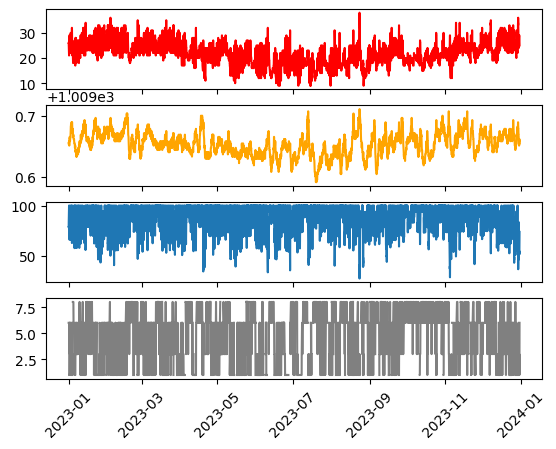

In [9]:
# Analisando os dados através de figuras
import matplotlib.pyplot as plt

fig,ax = plt.subplots(4,sharex=True)
ax[0].plot(metSuperficie['datetime'],metSuperficie['temp'],color='red')
ax[1].plot(metSuperficie['datetime'],metSuperficie['p'],color='orange')
ax[2].plot(metSuperficie['datetime'],metSuperficie['relh'])
ax[3].plot(metSuperficie['datetime'],metSuperficie['cco'],color='gray')
ax[3].tick_params(axis='x', rotation=45)

O percentil 99 da temperatura é:32.0
O percentil 99 da pressão é:1009.6967607391396
O percentil 99 da cco é:1009.6967607391396


{'whiskers': [<matplotlib.lines.Line2D at 0x284de708290>,
 'caps': [<matplotlib.lines.Line2D at 0x284de709910>,
 'boxes': [<matplotlib.lines.Line2D at 0x284db5df090>],
 'medians': [<matplotlib.lines.Line2D at 0x284de70afd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x284de70bb10>],
 'means': []}

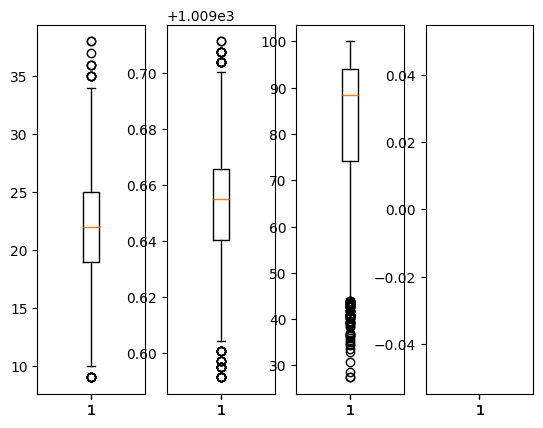

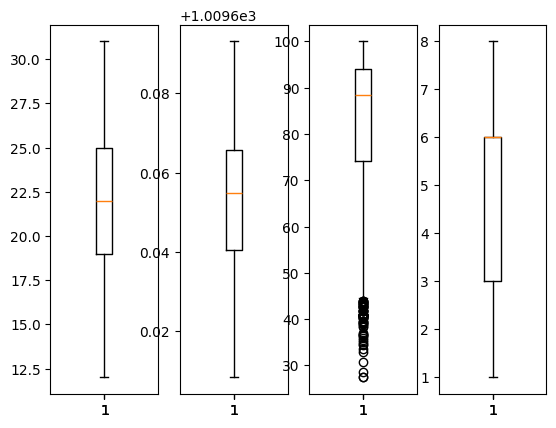

In [10]:
# Fazendo boxplot das variáveis
fig,ax = plt.subplots(1,4,sharex=True)
ax[0].boxplot(metSuperficie['temp'])
ax[1].boxplot(metSuperficie['p'])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'])

# Removendo valores acima do percentil 95°
import numpy as np
temp99 = np.percentile(metSuperficie['temp'],99)
print('O percentil 99 da temperatura é:'+str(temp99))
p99 = np.percentile(metSuperficie['p'],99)
print('O percentil 99 da pressão é:'+str(p99))
#print(metSuperficie['temp']<temp99)
cco99 = np.nanpercentile(metSuperficie['cco'],99)
print('O percentil 99 da cco é:'+str(p99))

fig,ax = plt.subplots(1,4,sharex=True)
ax[0].boxplot(metSuperficie['temp'][(metSuperficie['temp']<temp99) & 
              (metSuperficie['temp']>np.percentile(metSuperficie['temp'],0.5))])
ax[1].boxplot(metSuperficie['p'][(metSuperficie['p']<p99) & 
              (metSuperficie['p']>np.percentile(metSuperficie['p'],0.5))])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'][~np.isnan(metSuperficie['cco'])])


      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN   50.0  2.572220   762.0  6.0  6.0   
1       1      1  2023     1 NaN   20.0  3.086664  1066.8  6.0  6.0   
2       1      1  2023     2 NaN  350.0  2.057776  1066.8  6.0  6.0   
3       1      1  2023     8 NaN  320.0  0.514444     NaN  NaN  NaN   
4       1      1  2023     9 NaN    0.0  0.000000   304.8  1.0  1.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
6872   30     12  2023    19 NaN   60.0  3.086664  1371.6  1.0  1.0   
6873   30     12  2023    20 NaN  100.0  4.629996  1371.6  1.0  1.0   
6874   30     12  2023    21 NaN   90.0  4.629996  1371.6  1.0  1.0   
6875   30     12  2023    22 NaN  100.0  3.601108  1219.2  3.0  3.0   
6876   30     12  2023    23 NaN  120.0  4.629996   762.0  6.0  6.0   

                p  temp  dpTemp  vis   pw    relh            datetime  
0     1009.654835  26.0    22.0  NaN  0.0   78.62 2023-01-01 00:00:00  
1  

C:\Users\Giovanna\AppData\Local\Temp\ipykernel_9368\2271672969.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()
C:\Users\Giovanna\AppData\Local\Temp\ipykernel_9368\2271672969.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  min_mensal = metSuperficie.resample('M').min()


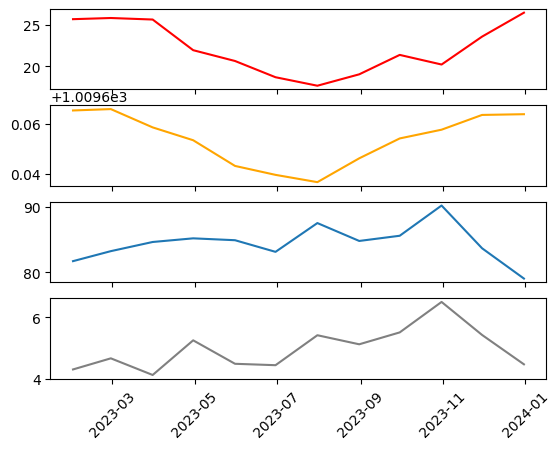

In [11]:
# Estatísticas dos dados
print(metSuperficie)
metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('M').mean()
min_mensal = metSuperficie.resample('M').min()

# Plotando figura após fazer a média mensal
fig,ax = plt.subplots(4,sharex=True)
ax[0].plot(media_mensal.index,media_mensal['temp'],color='red')
ax[1].plot(media_mensal.index,media_mensal['p'],color='orange')
ax[2].plot(media_mensal.index,media_mensal['relh'])
ax[3].plot(media_mensal.index,media_mensal['cco'],color='gray')
ax[3].tick_params(axis='x', rotation=45)

print(min_mensal)

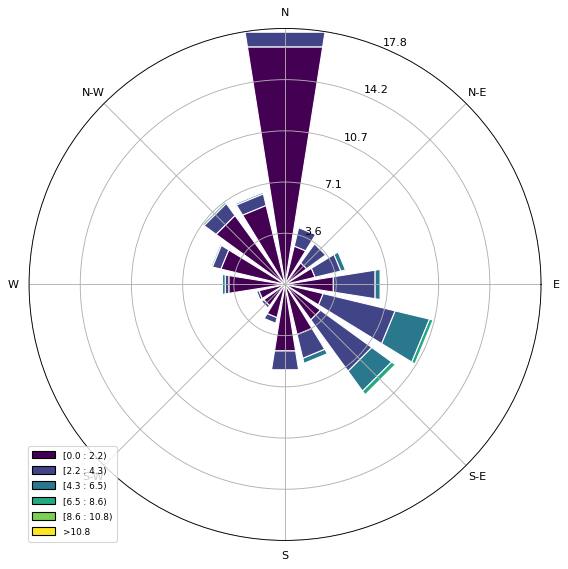

In [12]:
# Criando minha rosa dos ventos
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()



# Análise upperair/sondagem/perfil da atmosfera
Nesta parte vamos analisar os dados de sondagem coletados em Florianópolis utilizando a biblioteca Siphon do Python.

Dados para a data: 2023-01-10 00:00:00
    pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0     1014.0      5.0         23.2      18.3         90      2  -2.000000   
1     1000.0    125.0         22.4      16.4         60      7  -6.062178   
2      925.0    797.0         16.6      14.4         55      5  -4.095760   
3      911.0    927.0         15.4      13.7         75      5  -4.829629   
4      878.0   1240.0         14.2       8.2        123      4  -3.354682   
..       ...      ...          ...       ...        ...    ...        ...   
84      26.2  24709.0        -56.1     -88.1        101     25 -24.540680   
85      26.0  24757.0        -56.2     -88.2        100     25 -24.620194   
86      24.8  25057.0        -56.5     -88.5         96     23 -22.874004   
87      23.3  25456.0        -53.1     -87.1         91     20 -19.996954   
88      23.0      NaN          NaN       NaN         90     19 -19.000000   

          v_wind station  station_nu

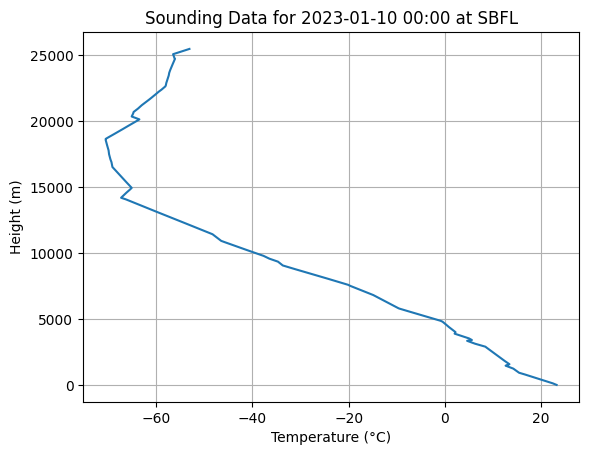

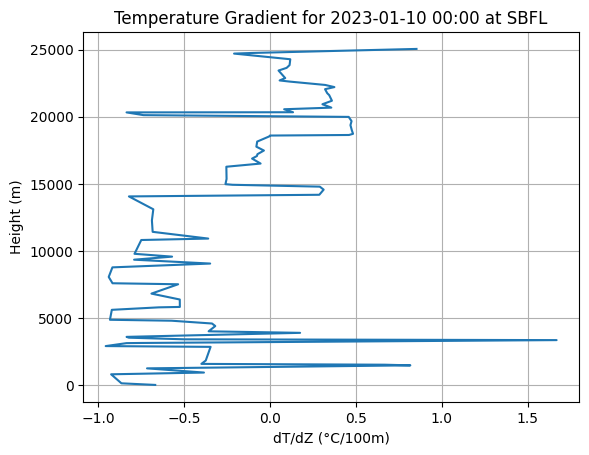

Dados para a data: 2023-01-10 12:00:00
    pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0     1015.0       5         25.8      18.8      330.0    5.0   2.500000   
1     1004.0      97         23.4      18.4      341.0    6.0   1.953409   
2     1000.0     131         23.2      17.2      345.0    7.0   1.811733   
3      925.0     808         18.2      14.0      335.0   11.0   4.648801   
4      884.0    1195         15.4      14.0      347.0   13.0   2.924364   
..       ...     ...          ...       ...        ...    ...        ...   
83      40.0   22046        -60.6     -89.0       85.0   12.0 -11.954336   
84      39.0   22203        -60.3     -88.9      110.0   18.0 -16.914467   
85      37.0   22531        -59.5     -88.6      100.0   24.0 -23.635386   
86      35.0   22877        -58.7     -88.2       75.0   22.0 -21.250368   
87      33.0   23243        -57.9     -87.9        NaN    NaN        NaN   

       v_wind station  station_number           

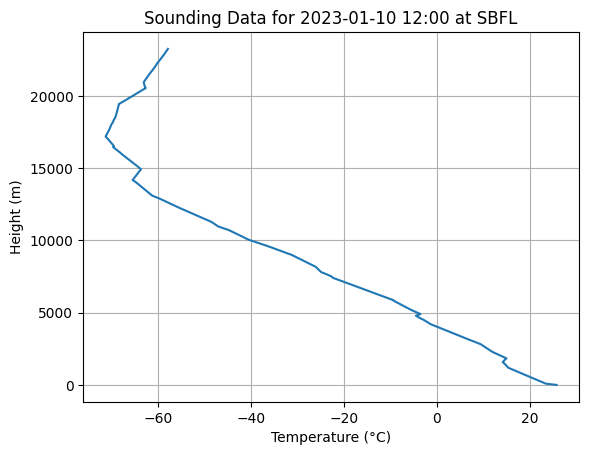

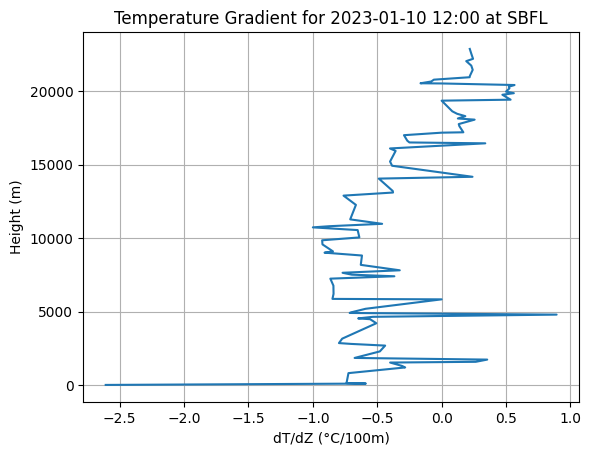

Dados para a data: 2023-01-15 00:00:00
    pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0     1012.0      5.0         23.6      21.3        190     10   1.736482   
1     1000.0    107.0         23.0      19.9        165     10  -2.588190   
2      934.0    701.0         19.0      18.1        152     23 -10.797846   
3      925.0    785.0         19.0      17.8        150     25 -12.500000   
4      850.0   1511.0         17.4      15.9         70     11 -10.336619   
5      846.0   1551.0         17.2      15.7         68     11 -10.199022   
6      785.0   2189.0         13.4      13.4         39     13  -8.181165   
7      700.0   3149.0          8.6       7.9        355     16   1.394492   
8      601.0   4400.0          1.6       0.5        339     19   6.808991   
9      507.0   5760.0         -4.7      -4.9        321     22  13.845049   
10     503.0   5823.0         -4.5      -5.7        321     22  13.845049   
11     500.0   5870.0         -5.1   

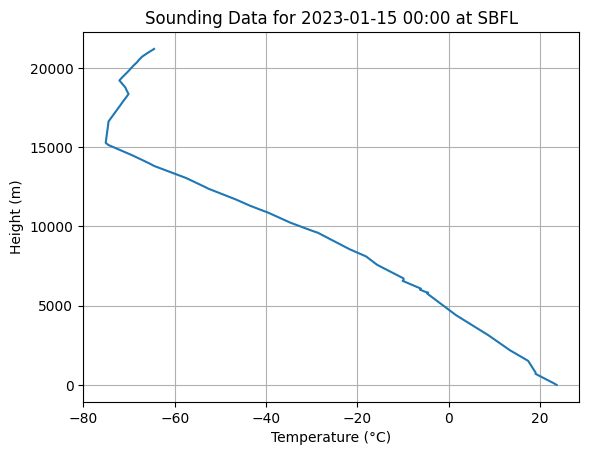

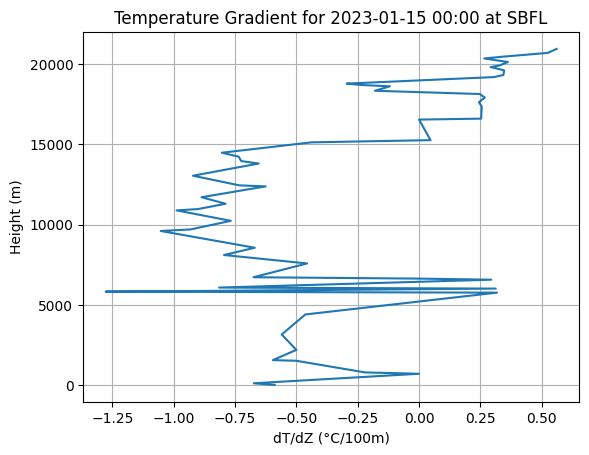

Dados para a data: 2023-01-15 12:00:00
    pressure  height  temperature  dewpoint  direction  speed        u_wind  \
0     1012.0       5         22.8      22.8      240.0    4.0  3.464102e+00   
1     1000.0     111         21.4      21.2      280.0    7.0  6.893654e+00   
2      925.0     787         19.4      19.4      140.0    9.0 -5.785088e+00   
3      903.0     995         18.6      18.6       90.0   10.0 -1.000000e+01   
4      887.0    1150         18.8      17.7       53.0   11.0 -8.784991e+00   
5      850.0    1516         16.4      16.2      325.0   13.0  7.456494e+00   
6      700.0    3152          8.6       8.6      325.0   14.0  8.030070e+00   
7      652.0    3739          6.2       5.6      326.0   17.0  9.506279e+00   
8      523.0    5515         -4.1      -5.8      329.0   25.0  1.287595e+01   
9      500.0    5870         -4.5      -5.4      330.0   27.0  1.350000e+01   
10     499.0    5886         -4.5      -5.4      330.0   27.0  1.350000e+01   
11     429.0 

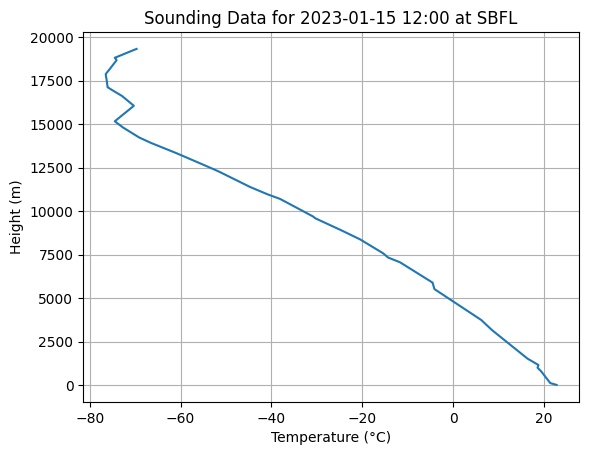

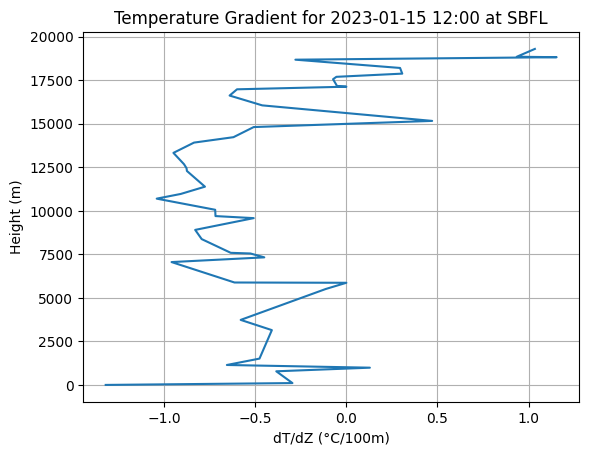

Dados para a data: 2023-01-20 00:00:00
    pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0     1015.0      5.0         25.2      22.3        120      8  -6.928203   
1     1000.0    137.0         24.2      21.9         80      9  -8.863270   
2      964.0    458.0         21.6      20.6         73      9  -8.606743   
3      925.0    816.0         19.6      17.2         65      8  -7.250462   
4      893.0   1120.0         17.6      16.3         71      8  -7.564149   
..       ...      ...          ...       ...        ...    ...        ...   
83      31.0  23641.0        -55.0     -90.7         65     22 -19.938771   
84      30.0  23850.0        -56.1     -91.1         60     18 -15.588457   
85      29.0  24065.0        -56.3     -91.3         70     13 -12.216004   
86      26.4  24661.0        -56.9     -91.9         70     16 -15.035082   
87      26.0      NaN          NaN       NaN         70     17 -15.974775   

      v_wind station  station_number

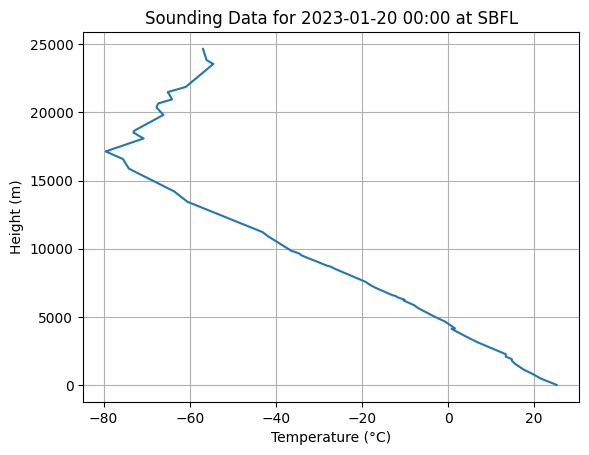

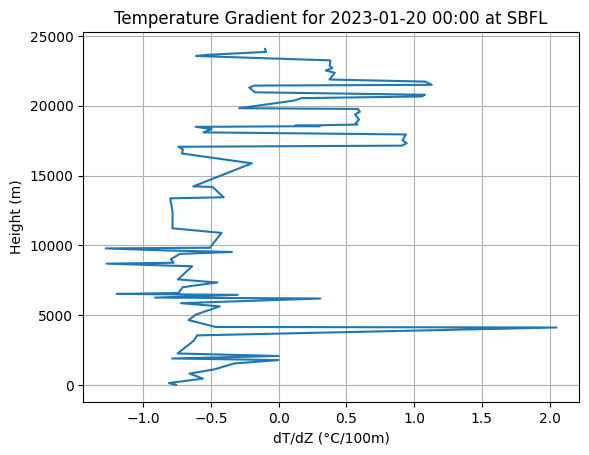

Dados para a data: 2023-01-20 12:00:00
    pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0     1013.0      5.0         24.0      23.2        270      5   5.000000   
1     1002.0    102.0         23.1      22.1        305     11   9.010672   
2     1000.0    120.0         23.0      21.9        305     12   9.829825   
3      975.0    340.0         20.9      20.6        320     10   6.427876   
4      965.0    430.0         20.0      20.0        338     14   5.244492   
..       ...      ...          ...       ...        ...    ...        ...   
90      30.4  23735.0        -55.1     -91.1         75     27 -26.079997   
91      30.0  23820.0        -55.5     -90.5         75     29 -28.011849   
92      29.0  24036.0        -55.6     -90.6         50     28 -21.449244   
93      24.2  25188.0        -55.9     -90.9         55     25 -20.478801   
94      24.0      NaN          NaN       NaN         55     25 -20.478801   

          v_wind station  station_nu

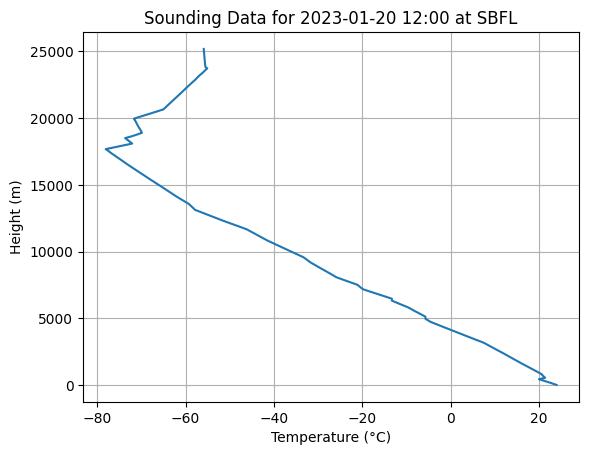

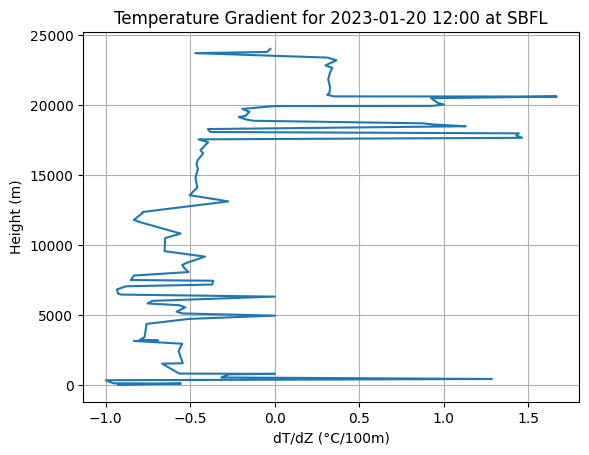

Dados para a data: 2023-01-23 00:00:00
    pressure  height  temperature  dewpoint  direction  speed        u_wind  \
0     1007.0       5         26.8      19.8      160.0    7.0 -2.394141e+00   
1     1001.0      54         27.6      19.6      164.0   10.0 -2.756374e+00   
2     1000.0      62         27.6      19.6      165.0   10.0 -2.588190e+00   
3      950.0     515         23.8      18.4      185.0   13.0  1.133025e+00   
4      925.0     750         21.8      17.7      180.0   17.0 -2.081900e-15   
..       ...     ...          ...       ...        ...    ...           ...   
62      97.0   16738        -74.0     -86.5      270.0   18.0  1.800000e+01   
63      93.0   16983        -74.0     -87.0      325.0   11.0  6.309341e+00   
64      84.0   17577        -73.8     -88.3      310.0   10.0  7.660444e+00   
65      82.0   17717        -73.7     -88.6      270.0    9.0  9.000000e+00   
66      81.6   17746        -73.7     -88.7        NaN    NaN           NaN   

          v_

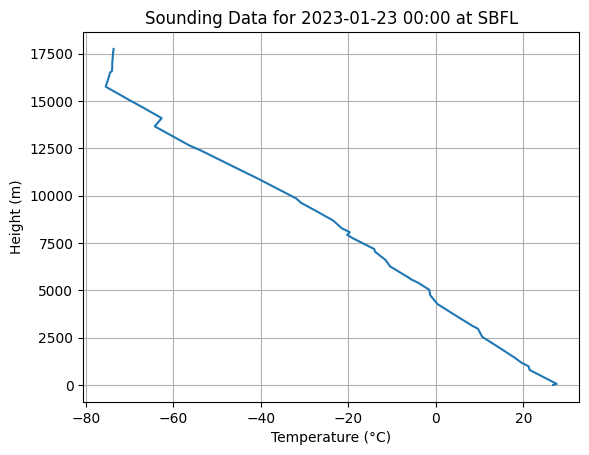

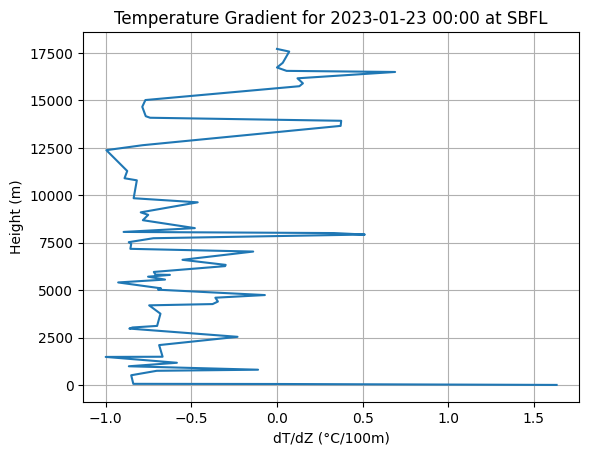

Dados para a data: 2023-01-23 12:00:00
    pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0     1008.0       5         27.6      24.7      280.0    3.0   2.954423   
1     1003.0      46         25.2      21.5      308.0    3.0   2.364032   
2     1000.0      71         24.8      21.3      325.0    3.0   1.720729   
3      962.0     411         22.8      18.8      213.0    9.0   4.901751   
4      956.0     466         23.2      17.2      195.0   10.0   2.588190   
..       ...     ...          ...       ...        ...    ...        ...   
73      45.0   21270        -63.7     -87.8      110.0   18.0 -16.914467   
74      39.0   22153        -60.7     -87.8      115.0   16.0 -14.500925   
75      38.0   22314        -60.1     -87.7       85.0   21.0 -20.920089   
76      36.0   22647        -59.0     -87.7       55.0    8.0  -6.553216   
77      35.5   22734        -58.7     -87.7        NaN    NaN        NaN   

      v_wind station  station_number            

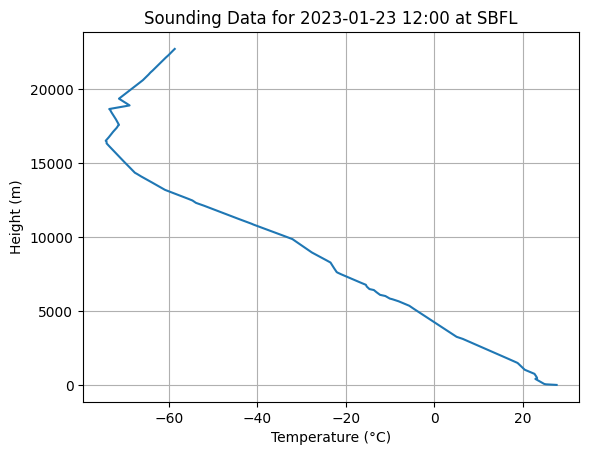

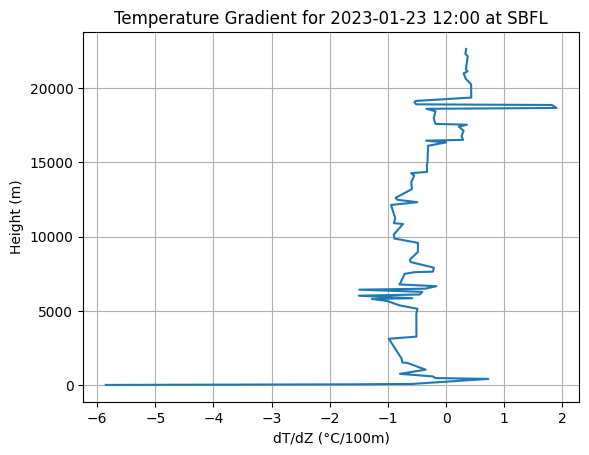

Dados para a data: 2023-01-27 00:00:00
    pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0     1013.0       5         26.0      21.0       10.0   10.0  -1.736482   
1     1000.0     117         25.0      20.2       10.0   13.0  -2.257426   
2      956.0     511         21.7      18.6        0.0   19.0  -0.000000   
3      944.0     621         20.8      18.2      355.0   19.0   1.655959   
4      932.0     733         21.6      10.1      350.0   18.0   3.125667   
..       ...     ...          ...       ...        ...    ...        ...   
88      47.0   21039        -66.9     -91.0      120.0   24.0 -20.784610   
89      43.0   21583        -64.9     -90.7       60.0   24.0 -20.784610   
90      37.0   22503        -61.6     -90.0       80.0   15.0 -14.772116   
91      35.0   22844        -60.4     -89.8       85.0   27.0 -26.897257   
92      34.0   23021        -59.7     -89.7        NaN    NaN        NaN   

       v_wind station  station_number       time

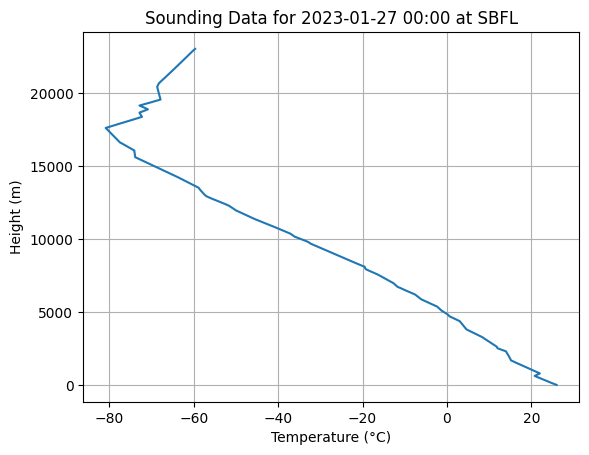

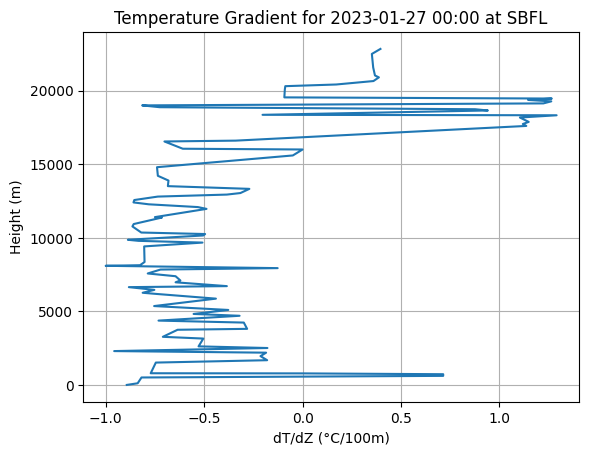

Dados para a data: 2023-01-27 12:00:00
     pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0      1013.0      5.0         27.8      20.8        300      5   4.330127   
1      1008.0     48.0         25.2      19.2        313      8   5.850830   
2      1000.0    116.0         24.6      19.6        335     12   5.071419   
3       944.9    610.0         20.1      17.2        345     19   4.917562   
4       925.0    795.0         18.4      16.3        350     20   3.472964   
..        ...      ...          ...       ...        ...    ...        ...   
109      25.0  24953.0        -56.1     -87.9         95     33 -32.874425   
110      24.0  25212.0        -55.5     -87.7         75     38 -36.705181   
111      20.0  26370.0        -52.9     -86.9         90     36 -36.000000   
112      19.3  26601.0        -51.3     -86.3         87     37 -36.949293   
113      19.0      NaN          NaN       NaN         85     37 -36.859204   

           v_wind statio

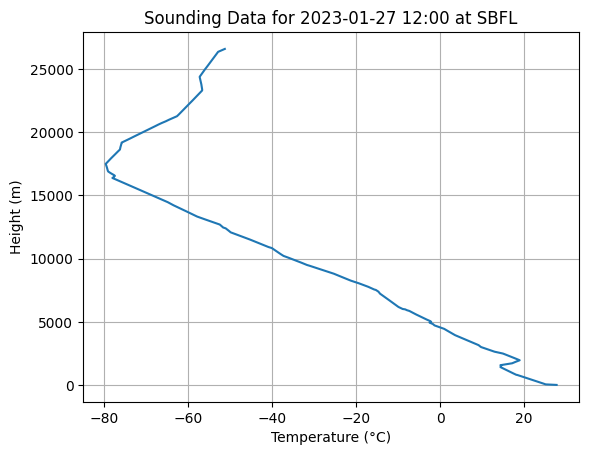

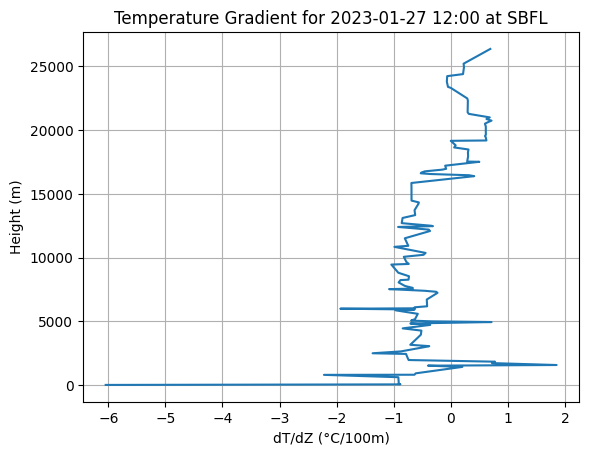

Dados para a data: 2023-07-10 00:00:00
    pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0     1019.0      5.0         18.2      16.0          0      0   0.000000   
1     1012.0     63.0         18.8      15.1        349      2   0.381618   
2     1000.0    163.0         18.2      15.1        330      6   3.000000   
3      931.0    771.0         13.0      12.5         16     16  -4.410198   
4      925.0    825.0         12.8      12.0         20     17  -5.814342   
..       ...      ...          ...       ...        ...    ...        ...   
78      33.9  23065.0        -50.7     -84.7        270     23  23.000000   
79      32.0  23440.0        -50.7     -84.7        265     21  20.920089   
80      30.0  23860.0        -50.7     -84.7        265     28  27.893452   
81      27.1  24519.0        -52.5     -84.5        284     40  38.811829   
82      27.0      NaN          NaN       NaN        285     40  38.637033   

          v_wind station  station_nu

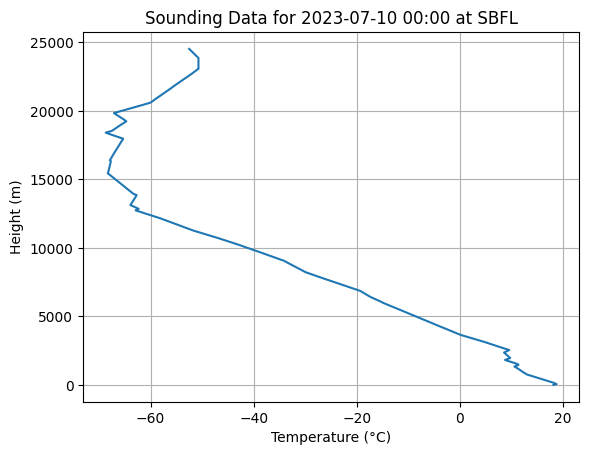

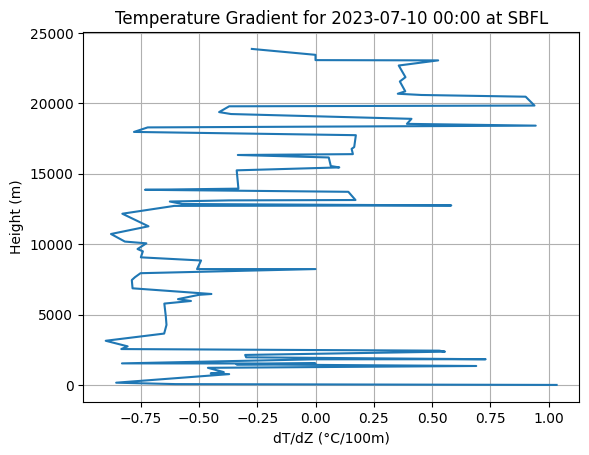

Dados para a data: 2023-07-10 12:00:00
    pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0     1015.0       5         18.2      17.2      310.0   10.0   7.660444   
1     1009.0      57         18.0      17.1      330.0   12.0   6.000000   
2     1000.0     136         17.8      16.9      330.0   16.0   8.000000   
3      925.0     801         14.8      14.8      350.0   29.0   5.035797   
4      874.0    1280         12.6      12.6      306.0   26.0  21.034442   
..       ...     ...          ...       ...        ...    ...        ...   
85      25.8   24787        -50.7     -84.7      277.0   43.0  42.679485   
86      24.0   25262        -49.3     -84.0      300.0   49.0  42.435245   
87      22.0   25834        -47.7     -83.1      275.0   39.0  38.851593   
88      21.0   26140        -46.8     -82.6      290.0   33.0  31.009856   
89      20.7   26235        -46.5     -82.5        NaN    NaN        NaN   

       v_wind station  station_number           

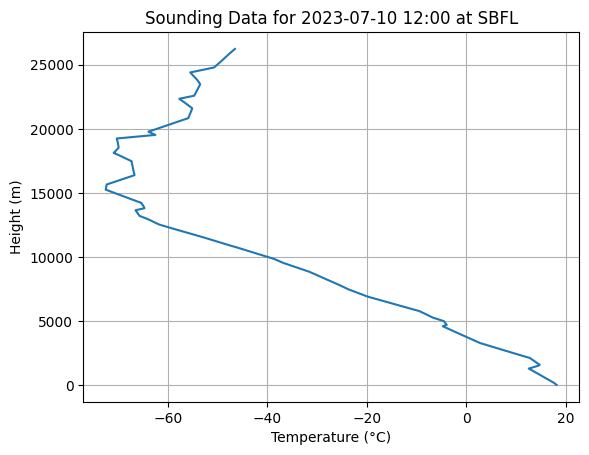

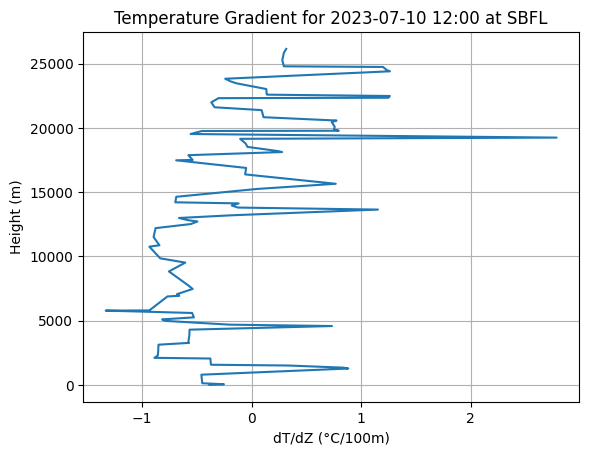

Dados para a data: 2023-07-15 00:00:00
    pressure  height  temperature  dewpoint  direction  speed        u_wind  \
0     1022.0       5         13.4      10.6        0.0    0.0 -0.000000e+00   
1     1015.0      63         14.2       9.2       57.0    2.0 -1.677341e+00   
2     1000.0     188         13.2       8.5      180.0    5.0 -6.123234e-16   
3      925.0     839          8.8       7.3        0.0    4.0 -0.000000e+00   
4      850.0    1536          4.8       4.2      275.0   13.0  1.295053e+01   
5      834.0    1691          3.6       2.6      274.0   13.0  1.296833e+01   
6      790.0    2130          2.4     -12.6      271.0   14.0  1.399787e+01   
7      768.0    2358          1.0      -4.0      270.0   14.0  1.400000e+01   
8      708.0    3009         -1.3     -17.3      266.0   15.0  1.496346e+01   
9      700.0    3100         -0.5     -30.5      265.0   15.0  1.494292e+01   
10     698.0    3123         -0.3     -35.3      265.0   15.0  1.494292e+01   
11     629.0 

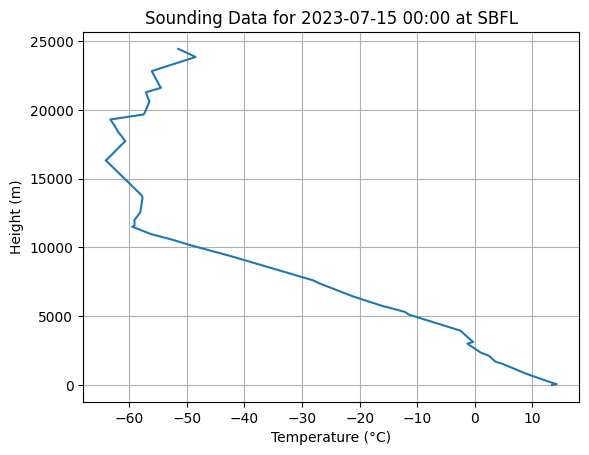

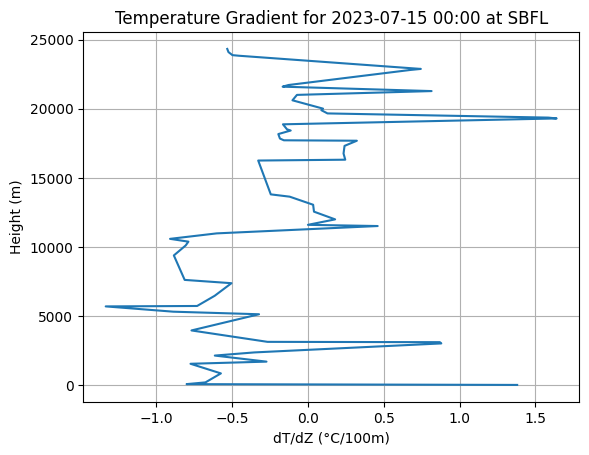

Dados para a data: 2023-07-15 12:00:00
    pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0     1022.0      5.0         11.8      11.6        210      4   2.000000   
1     1017.0     46.0         12.6      10.9        229      4   3.018838   
2     1000.0    189.0         11.8      10.1        295      2   1.812616   
3      931.0    786.0          9.6       7.0        336     10   4.067366   
4      925.0    840.0          9.2       7.0        340     11   3.762222   
..       ...      ...          ...       ...        ...    ...        ...   
72      48.9  20746.0        -64.7     -89.7        270     20  20.000000   
73      48.0  20861.0        -64.0     -89.5        265     23  22.912478   
74      46.0  21125.0        -62.4     -89.2        295     27  24.470310   
75      41.4  21777.0        -58.3     -88.3        281     35  34.356951   
76      41.0      NaN          NaN       NaN        280     36  35.453079   

          v_wind station  station_nu

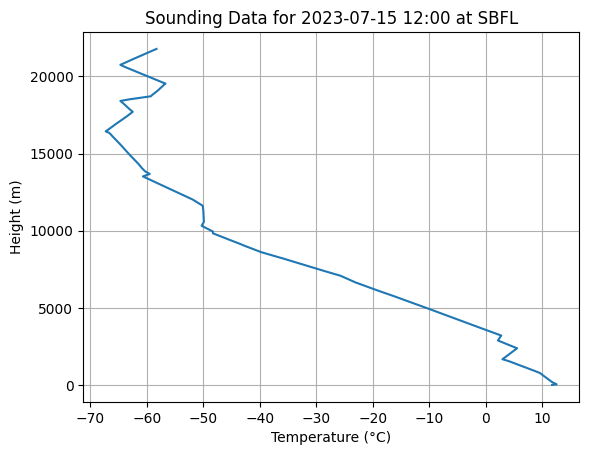

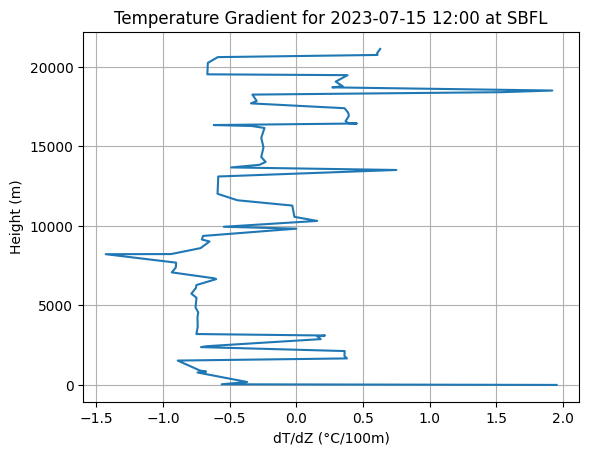

Dados para a data: 2023-07-20 00:00:00
    pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0     1033.0      5.0         14.8      10.8         40      2  -1.285575   
1     1027.0     54.0         15.8       9.8         62      3  -2.648843   
2     1000.0    278.0         14.2       9.6        160      5  -1.710101   
3      925.0    932.0          9.6       7.9         90     18 -18.000000   
4      894.0   1214.0          7.6       5.3         80     16 -15.756924   
..       ...      ...          ...       ...        ...    ...        ...   
56      35.0  22936.0        -55.8     -86.9        275     24  23.908673   
57      33.0  23307.0        -54.8     -86.6        290     29  27.251086   
58      32.4  23422.0        -54.5     -86.5        281     30  29.448816   
59      32.1  23482.0        -54.7     -86.7        277     30  29.776385   
60      32.0      NaN          NaN       NaN        275     30  29.885841   

          v_wind station  station_nu

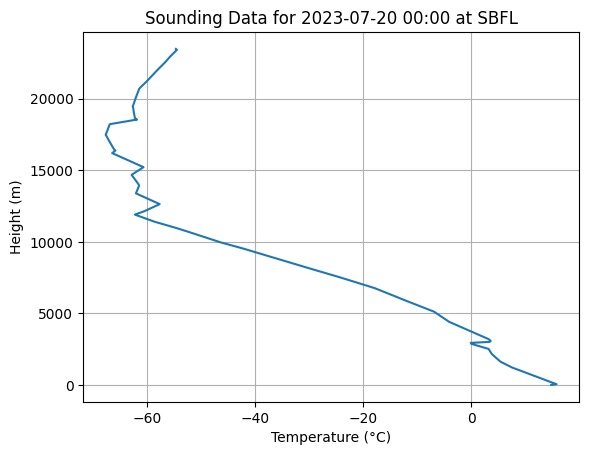

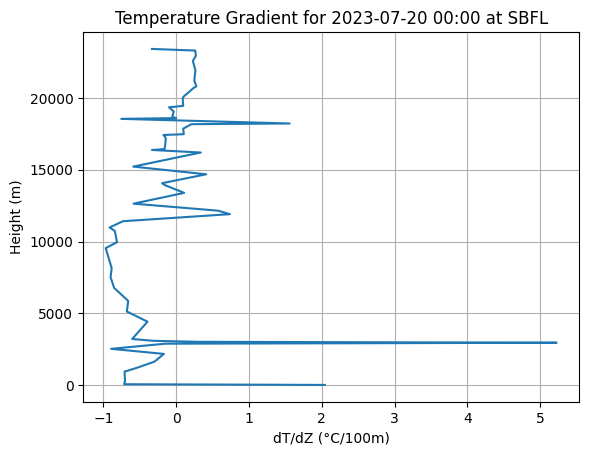

Dados para a data: 2023-07-20 12:00:00
    pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0     1032.0       5         14.0      14.0        0.0    0.0  -0.000000   
1     1000.0     270         13.2      13.2      315.0    4.0   2.828427   
2      975.0     484         13.2      13.0      338.0   10.0   3.746066   
3      926.4     914         11.1      11.1       25.0   23.0  -9.720220   
4      925.0     927         11.0      11.0       25.0   23.0  -9.720220   
..       ...     ...          ...       ...        ...    ...        ...   
61      55.0   20103        -63.5     -89.7      295.0    6.0   5.437847   
62      53.0   20331        -63.1     -89.6      290.0   11.0  10.336619   
63      50.0   20690        -62.5     -89.5      280.0   15.0  14.772116   
64      48.0   20943        -60.7     -89.3      265.0   14.0  13.946726   
65      47.6   20995        -60.3     -89.3        NaN    NaN        NaN   

       v_wind station  station_number           

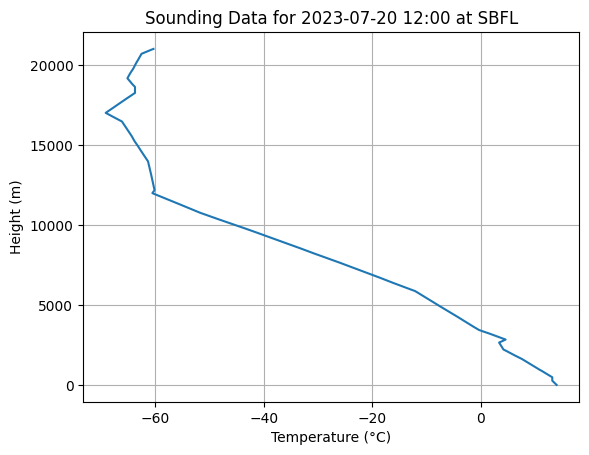

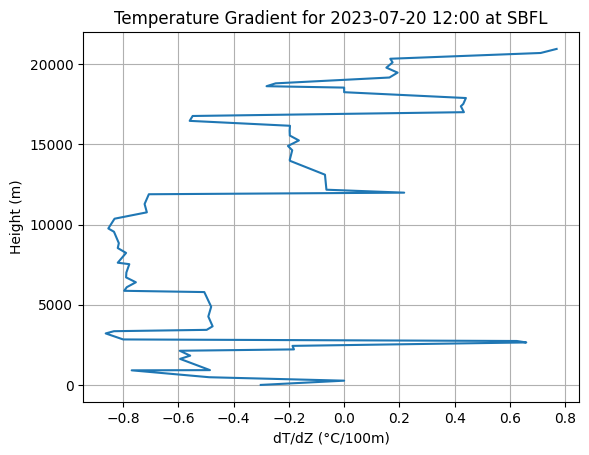

Dados para a data: 2023-07-25 00:00:00
    pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0     1021.0      5.0         18.8      18.6          0      0   0.000000   
1     1000.0    181.0         17.4      17.3        125      4  -3.276608   
2      961.0    520.0         16.4      16.3        195     11   2.847009   
3      955.0    574.0         16.2      16.2        200     11   3.762222   
4      948.0    636.0         16.0      16.0        223     10   6.819984   
..       ...      ...          ...       ...        ...    ...        ...   
85      39.0  22253.0        -56.9     -87.5        285     27  26.079997   
86      38.0  22419.0        -55.5     -86.9        270     29  29.000000   
87      36.3  22711.0        -52.9     -85.9        282     27  26.409985   
88      34.1  23112.0        -54.5     -86.5        299     24  20.990873   
89      34.0      NaN          NaN       NaN        300     24  20.784610   

          v_wind station  station_nu

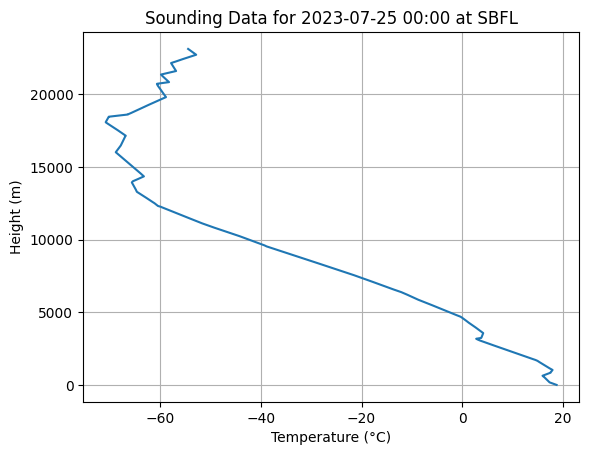

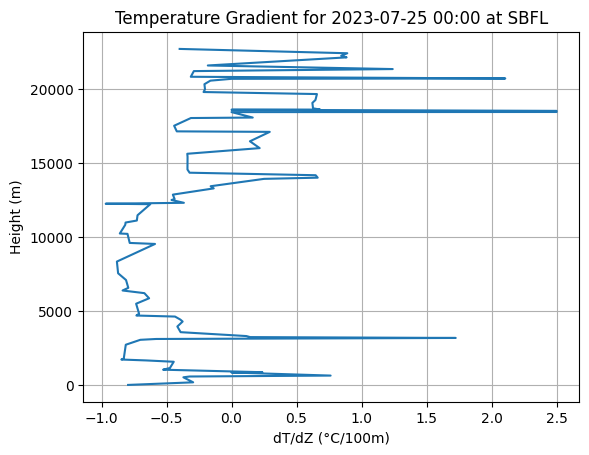

Dados para a data: 2023-07-25 12:00:00
    pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0     1018.0       5         18.6      17.5        0.0   11.0  -0.000000   
1     1000.0     158         18.0      17.3      335.0   15.0   6.339274   
2      996.0     192         18.0      16.8      329.0   15.0   7.725571   
3      980.0     332         18.8      15.5      303.0   13.0  10.902717   
4      975.0     376         21.2      14.2      295.0   12.0  10.875693   
..       ...     ...          ...       ...        ...    ...        ...   
81      28.0   24332        -54.4     -86.4      285.0   23.0  22.216294   
82      23.6   25426        -54.7     -86.7      278.0   38.0  37.630187   
83      22.0   25877        -52.8     -85.5      275.0   44.0  43.832567   
84      21.4   26055        -52.1     -85.1        NaN    NaN        NaN   
85      21.0   26177        -52.1     -85.1        NaN    NaN        NaN   

       v_wind station  station_number           

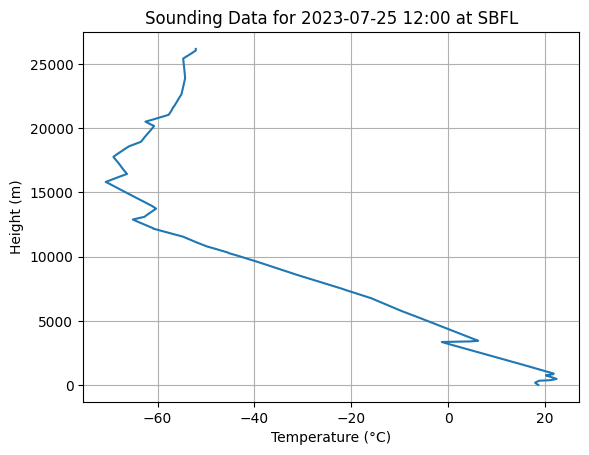

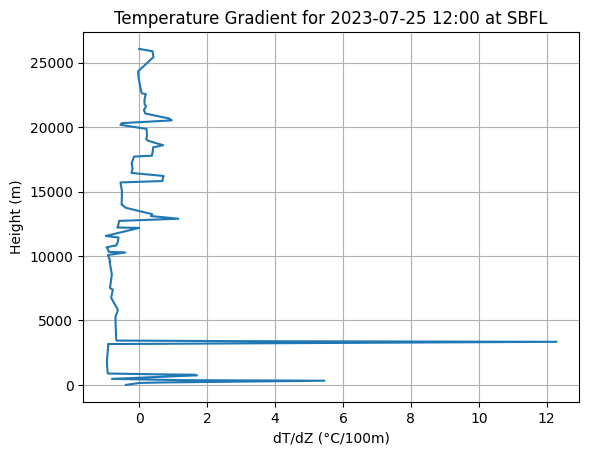

Dados para a data: 2023-07-30 00:00:00
    pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0     1027.0      5.0         12.4      11.1          0      0   0.000000   
1     1021.0     54.0         15.2      11.0         36      2  -1.175571   
2     1000.0    229.0         14.0      10.7        165      8  -2.070552   
3      998.0    246.0         13.8      10.8        164      8  -2.205099   
4      925.0    882.0          9.4       6.1        135      4  -2.828427   
..       ...      ...          ...       ...        ...    ...        ...   
65      41.0  21950.0        -57.6     -87.8        235     11   9.010672   
66      39.0  22265.0        -56.7     -87.5        270     11  11.000000   
67      36.0  22769.0        -55.2     -86.9        235     13  10.648977   
68      35.1  22928.0        -54.7     -86.7        244     14  12.583117   
69      35.0      NaN          NaN       NaN        245     14  12.688309   

          v_wind station  station_nu

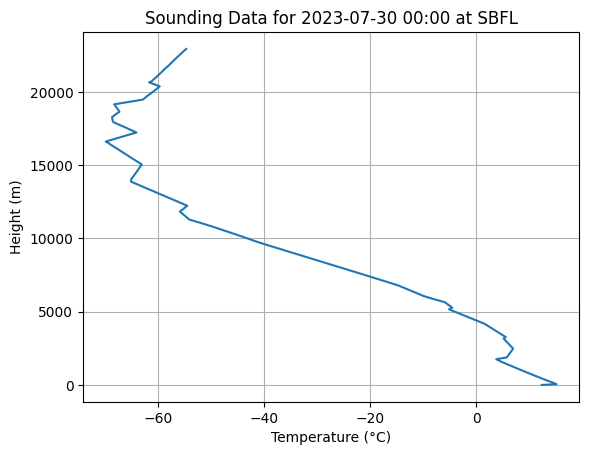

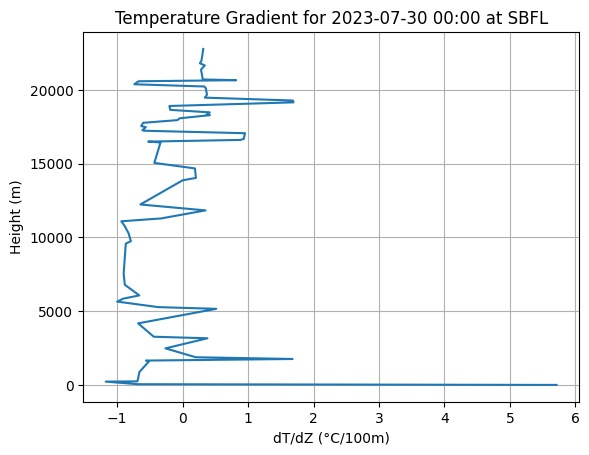

Dados para a data: 2023-07-30 12:00:00
    pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0     1025.0      5.0         13.4      13.2          0      0   0.000000   
1     1019.0     55.0         13.8      10.0        343      4   1.169487   
2     1007.0    156.0         13.0       9.0        310     11   8.426489   
3     1000.0    215.0         12.6       8.4        305     15  12.287281   
4      994.0    266.0         12.4       8.0        305     16  13.106433   
..       ...      ...          ...       ...        ...    ...        ...   
88      38.0  22414.0        -56.9     -87.4        280     10   9.848078   
89      36.0  22754.0        -55.8     -87.0        245     13  11.782001   
90      33.7  23169.0        -54.5     -86.5        241     10   8.746197   
91      33.1  23284.0        -54.7     -85.7        240      9   7.794229   
92      33.0      NaN          NaN       NaN        240      9   7.794229   

      v_wind station  station_number

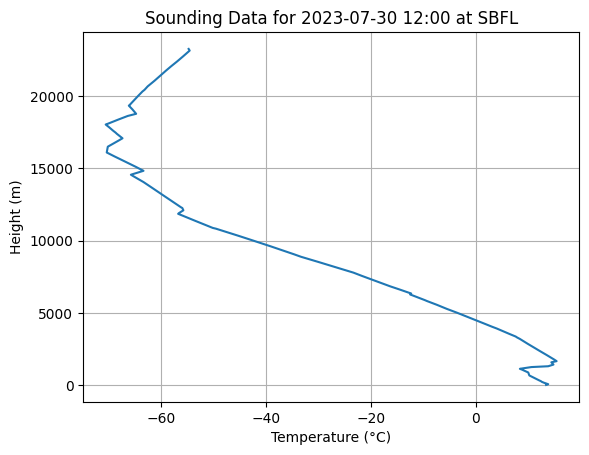

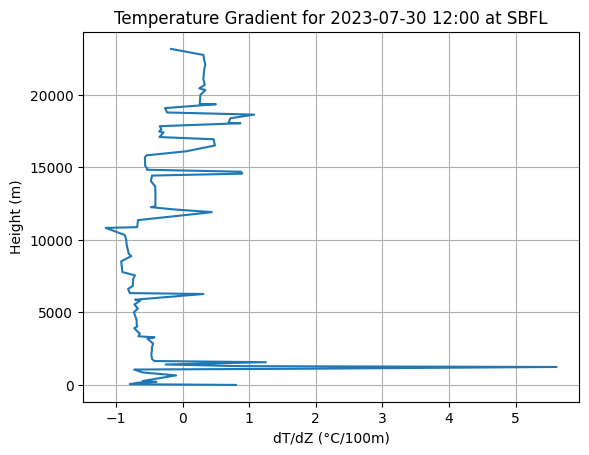

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
#from metpy.units import units
from siphon.simplewebservice.wyoming import WyomingUpperAir

# Datas para análise (5 dias no inverno e 5 dias no verão de 2023)
dates = [
    datetime(2023, 1, 10),
    datetime(2023, 1, 15),
    datetime(2023, 1, 20),
    datetime(2023, 1, 23),
    datetime(2023, 1, 27),
    datetime(2023, 7, 10),
    datetime(2023, 7, 15),
    datetime(2023, 7, 20),
    datetime(2023, 7, 25),
    datetime(2023, 7, 30)
]

# Horários para análise
times = [0, 12]

# Local da análise
station = 'SBFL'

# Extraindo os dados para cada data e criando gráficos
for date in dates:
    for time in times:
        dt = datetime(date.year, date.month, date.day, time)
        df = WyomingUpperAir.request_data(dt, station)
        print(f'Dados para a data: {dt}')
        print(df)
        print('\n')

        # Cálculo da razão de variação de temperatura em relação à altura (dTdZ)
        deltaT = np.diff(df['temperature'])
        deltaZ = np.diff(df['height'])
        dTdZ = (deltaT / deltaZ) * 100  # a cada 100 m
        print(dTdZ)

        # Gráfico da temperatura versus altura
        fig, ax = plt.subplots()
        ax.plot(df['temperature'], df['height'])
        ax.set_xlabel('Temperature (°C)')
        ax.set_ylabel('Height (m)')
        ax.set_title(f'Sounding Data for {dt.strftime("%Y-%m-%d %H:%M")} at {station}')
        plt.grid(True)
        plt.show()

        # Gráfico da razão de variação de temperatura em relação à altura (dTdZ)
        fig, ax = plt.subplots()
        ax.plot(dTdZ, df['height'][:-1])  # df['height'][:-1] para alinhar com dTdZ
        ax.set_xlabel('dT/dZ (°C/100m)')
        ax.set_ylabel('Height (m)')
        ax.set_title(f'Temperature Gradient for {dt.strftime("%Y-%m-%d %H:%M")} at {station}')
        plt.grid(True)
        plt.show()



# Análise de dados no espaço
Nesta parte analisaremos os dados de temperatura em uma região utilizando previsão meteorológica

['Best GFS Quarter Degree Forecast Time Series']
['reftime', 'latitude', 'time', 'longitude', 'Temperature_surface', 'LatLon_721X1440-0p13S-180p00E-2']


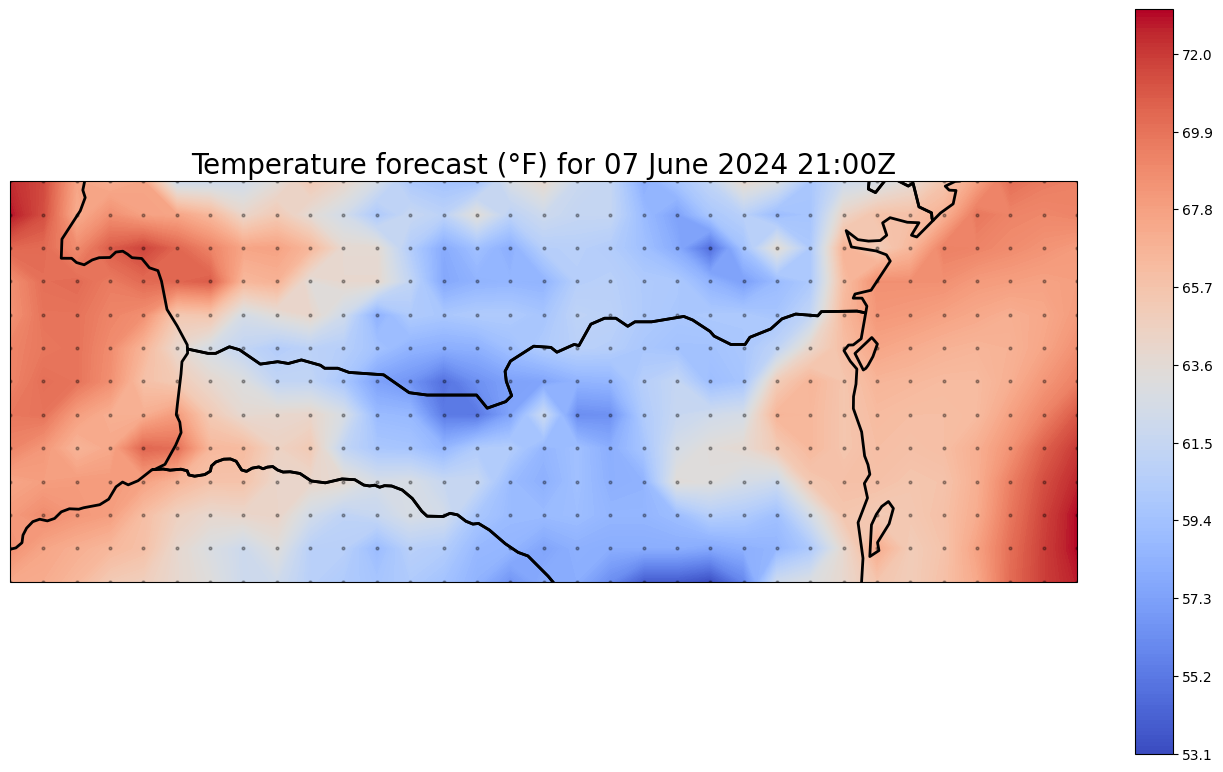

In [13]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np

from siphon.catalog import TDSCatalog

best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
print(list(best_gfs.datasets))

best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

query = ncss.query()
#nao sei da onde ele tira essas coordenadas, mas o codigo está rodando, e o datetime ta pegando de agora (utcnow)
query.lonlat_box(north=-25, south=-28, east=-47, west=-55).time(datetime.utcnow())
query.accept('netcdf4')
query.variables('Temperature_surface')

data = ncss.get_data(query)
print(list(data.variables))

temp_var = data.variables['Temperature_surface'] # Podem analisar outras variáveis. 

# Time variables can be renamed in GRIB collections. Best to just pull it out of the
# coordinates attribute on temperature
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Get the actual data values and remove any size 1 dimensions
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()

# Convert the number of hours since the reference time to an actual date
time_val = num2date(time_var[:].squeeze(), time_var.units)

# Convert temps to Fahrenheit from Kelvin
temp_vals = temp_vals * 1.8 - 459.67

# Combine 1D latitude and longitudes into a 2D grid of locations
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Create a new figure
fig = plt.figure(figsize=(15, 12))

# Add the map and set the extent
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-55., -47., -28, -25])

# Add state boundaries to plot
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=2)

# Contour temperature at each lat/long
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0,
                 cmap='coolwarm')

# Plot a colorbar to show temperature and reduce the size of it
plt.colorbar(cf, ax=ax, fraction=0.032)

# Make a title with the time value
ax.set_title(u'Temperature forecast (\u00b0F) for {0:%d %B %Y %H:%MZ}'.format(time_val),
             fontsize=20)

# Plot markers for each lat/long to show grid points for 0.25 deg GFS
ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2,
        alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')

